In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test,y_test)= tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

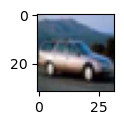

In [8]:
plot_sample(4)

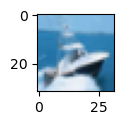

In [9]:
plot_sample(8)

In [10]:
classes=["airoplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[y_train[1][0]] # array in the form of arr=[[],[],[],[],[],[]]

'truck'

In [12]:
#scaling
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [13]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [14]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10
)

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation="relu"),
    #keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 128s 81ms/step - accuracy: 0.2925 - loss: 2.3722
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.3871 - loss: 1.7088
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.4225 - loss: 1.6240
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.4381 - loss: 1.5674
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.4513 - loss: 1.5488


In [36]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[0.38681766, 0.39205518, 0.60190237, ..., 0.09867721, 0.49893752,
        0.08911031],
       [0.63996416, 0.96623445, 0.14196384, ..., 0.10764553, 0.95567936,
        0.9844647 ],
       [0.8859534 , 0.8150009 , 0.25513792, ..., 0.42224285, 0.9342442 ,
        0.84541976],
       ...,
       [0.06960152, 0.02664261, 0.67724085, ..., 0.50212574, 0.1742811 ,
        0.05499662],
       [0.22427423, 0.10524894, 0.6539334 , ..., 0.35876527, 0.05623356,
        0.13973889],
       [0.5019699 , 0.10814547, 0.4615643 , ..., 0.946902  , 0.05763161,
        0.3664885 ]], dtype=float32)

In [37]:
classes[y_test[0][0]] 

'cat'

In [38]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


3

In [39]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4418 - loss: 1.5532


[1.5557376146316528, 0.4408000111579895]